<a href="https://colab.research.google.com/github/ErSangram/Capstone_03_Cardiovascular_Risk_Prediction/blob/main/Capstone_03_Cardiovascular_Risk_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Cardiovascular Risk Prediction



##### **Project Type**    - Unsupervised (Classification)
##### **Contribution**    - Individual
##### **Member  -** Sangram Naik

# **Project Summary -**

Before diving into the project, lets discuss what are Cardiovascular diseases and some of their major causes.

Cardiovascular diseases, also called CVDs, are the leading cause of death globally, causing an estimated 17.9 million deaths each year.

*CVDs are a group of disorders of the heart and blood vessels and include coronary heart disease, cerebrovascular disease, rheumatic heart disease and other conditions.* More than four out of five CVD deaths are due to heart attacks and strokes, and one third of these deaths occur prematurely in people under 70 years of age.

The most important behavioural risk factors of heart disease and stroke are unhealthy diet, physical inactivity, tobacco use and harmful use of alcohol.

The effects of behavioural risk factors may show up in individuals as raised blood pressure, raised blood glucose, raised blood lipids, and overweight and obesity.

# **GitHub Link -**

https://github.com/ErSangram/Capstone_03_Cardiovascular_Risk_Prediction

# **Problem Statement**


* Cardiovascular diseases (CVDs) are the leading cause of death globally, taking an estimated 17.9 million people died from CVDs in 2019, representing 32% of all global deaths. Of these deaths, 85% were due to heart attack and stroke.
* More than four out of five CVD deaths are due to heart attacks and strokes, and one third of these deaths occur prematurely in people under 70 years of age.
* The most important behavioural risk factors of heart disease and stroke are unhealthy diet, physical inactivity, tobacco use and harmful use of alcohol.
* Over three quarters of CVD deaths take place in low- and middle-income countries.
* **Objective -The classification goal is to predict whether the patient has a 10-year risk of future coronary heart disease (CHD) based on their health statistics and information about their tobacco usage.**

# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Importing data manipulation libraries.
import pandas as pd
import numpy as np
#Importing data visualization libraries.
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(color_codes=True) 
import warnings
warnings.filterwarnings("ignore")

## Machine Learning 
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, roc_curve, precision_recall_curve

### Dataset Loading

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Load Dataset
data = pd.read_csv('/content/drive/MyDrive/Alma_projects/data_cardiovascular_risk.csv')

### Dataset First View

In [4]:
# Dataset First Look
data.head()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


### Dataset Rows & Columns count

In [5]:
# Dataset Rows & Columns count
print(f'A Data contain {data.shape[0]} rows and {data.shape[1]} Columns')

A Data contain 3390 rows and 17 Columns


### Dataset Information

In [6]:
# Dataset Info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3390 non-null   int64  
 1   age              3390 non-null   int64  
 2   education        3303 non-null   float64
 3   sex              3390 non-null   object 
 4   is_smoking       3390 non-null   object 
 5   cigsPerDay       3368 non-null   float64
 6   BPMeds           3346 non-null   float64
 7   prevalentStroke  3390 non-null   int64  
 8   prevalentHyp     3390 non-null   int64  
 9   diabetes         3390 non-null   int64  
 10  totChol          3352 non-null   float64
 11  sysBP            3390 non-null   float64
 12  diaBP            3390 non-null   float64
 13  BMI              3376 non-null   float64
 14  heartRate        3389 non-null   float64
 15  glucose          3086 non-null   float64
 16  TenYearCHD       3390 non-null   int64  
dtypes: float64(9),

#### Duplicate Values

In [7]:
# Dataset Duplicate Value Count
len(data[data.duplicated()])

0

#### Missing Values/Null Values

In [8]:
# Missing Values/Null Values Count
n_df = data.isna().sum().sort_values(ascending=False).reset_index().rename(columns={'index':'Columns',0:'Null_values'})
n_df

,Columns,Null_values
0,glucose,304
1,education,87
2,BPMeds,44
3,totChol,38
4,cigsPerDay,22
5,BMI,14
6,heartRate,1
7,id,0
8,diaBP,0
9,sysBP,0


<Axes: >

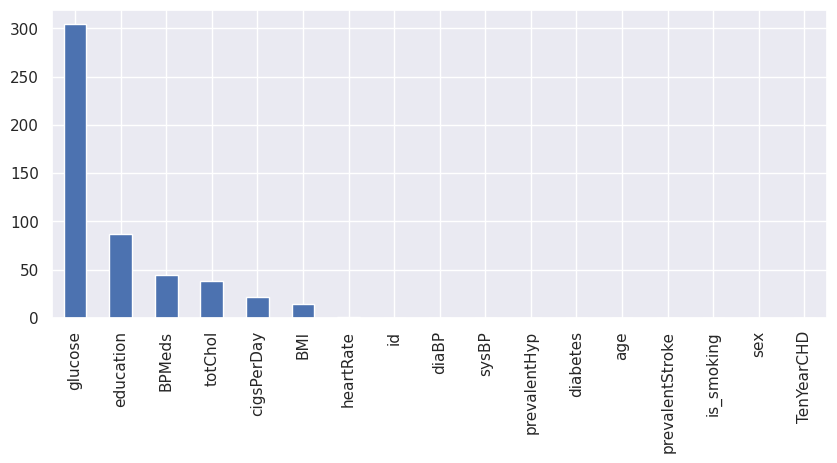

In [9]:
# Visualizing the missing values
plt.figure(figsize=(10,4))
data.isnull().sum().sort_values(ascending=False).plot(kind ='bar')

### What did you know about your dataset?

The Following Information we know from the dataset:

*  The Dataset consists of 3390 rows and 17 columns   
*  The datatype consists of int, float, and object values   
*  There is no duplicate values but there are certain missing values in some variables with 'glucose' having the maximum missing values in dataset

## ***2. Understanding Your Variables***

In [10]:
# Dataset Columns
data.columns

Index(['id', 'age', 'education', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [11]:
# Dataset Describe
data.describe()

,id,age,education,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,3390.000000,3390.000000,3303.000000,3368.000000,3346.000000,3390.000000,3390.000000,3390.000000,3352.000000,3390.00000,3390.000000,3376.000000,3389.000000,3086.000000,3390.000000
mean,1694.500000,49.542183,1.970936,9.069477,0.029886,0.006490,0.315339,0.025664,237.074284,132.60118,82.883038,25.794964,75.977279,82.086520,0.150737
std,978.753033,8.592878,1.019081,11.879078,0.170299,0.080309,0.464719,0.158153,45.247430,22.29203,12.023581,4.115449,11.971868,24.244753,0.357846
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.50000,48.000000,15.960000,45.000000,40.000000,0.000000
25%,847.250000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.00000,74.500000,23.020000,68.000000,71.000000,0.000000
50%,1694.500000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.50000,82.000000,25.380000,75.000000,78.000000,0.000000
75%,2541.750000,56.000000,3.000000,20.000000,0.000000,0.000000,1.000000,0.000000,264.000000,144.00000,90.000000,28.040000,83.000000,87.000000,0.000000
max,3389.000000,70.000000,4.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.00000,142.500000,56.800000,143.000000,394.000000,1.000000


### Variables Description 

Data Description
The dataset is from an ongoing cardiovascular study on residents of the town of Framingham, Massachusetts. The classification goal is to predict whether the patient has a 10-year risk of future coronary heart disease (CHD). The dataset provides the patients’ information. It includes over 4,000 records and 15 attributes.

Each attribute is a potential risk factor. These attributes are demographic, behavioral and medical risk factors.
Attribute Informations-

Demographic

* **Sex**: male or female("M" or "F")
* **Age**: Age of the patient;(Continuous - Although the recorded ages have been truncated to whole numbers, the concept of age is continuous)

Behavioral

*  **is_smoking**: whether or not the patient is a current smoker ("YES" or "NO")
*  **Cigs Per Day**: the number of cigarettes that the person smoked on average in one day.(can be considered continuous as one can have any number of cigarettes, even half a cigarette.)   

Medical( history)

*  **BP Meds**: whether or not the patient was on blood pressure medication (Nominal)
* **Prevalent Stroke**: whether or not the patient had previously had a stroke (Nominal)
* **Prevalent Hyp**: whether or not the patient was hypertensive (Nominal)
* **Diabetes**: whether or not the patient had diabetes (Nominal)  

Medical(current)

* **Tot Chol**: total cholesterol level (Continuous)
* **Sys BP**: systolic blood pressure (Continuous)
* **Dia BP**: diastolic blood pressure (Continuous)
* **BMI**: Body Mass Index (Continuous)
* **Heart Rate**: heart rate (Continuous - In medical research, variables such as heart rate though in fact discrete, yet are considered continuous because of large number of possible values.)
* **Glucose**: glucose level (Continuous)

Predict variable (desired target)

* **TenYear CSD** of coronary heart disease CHD(binary: “1”, means “Yes”, “0” means “No”) - DV

### Check Unique Values for each variable.

In [12]:
# Check Unique Values for each variable.
a,b = [],[]
for i in list(data.columns):
    a.append(i)
    b.append(data[i].nunique()) 
    
lis = list(zip(a,b))
df = pd.DataFrame(lis, columns = ['column_names','unique values'])
df

,column_names,unique values
0,id,3390
1,age,39
2,education,4
3,sex,2
4,is_smoking,2
5,cigsPerDay,32
6,BPMeds,2
7,prevalentStroke,2
8,prevalentHyp,2
9,diabetes,2


## 3. ***Data Wrangling***

### Data Wrangling Code

In [13]:
# Need to make data clean frist delete duplicate values from the dataset
data.drop_duplicates(inplace=True)

In [14]:
data.drop(['id'],axis=1, inplace=True)

In [15]:
data.dropna(axis=0, subset=['glucose'], inplace=True)

In [16]:
# Filling the missing values in the cigs_per_day variable
data['cigsPerDay'] = data['cigsPerDay'].fillna(data[data['is_smoking']=='YES']['cigsPerDay'].mode())

In [17]:
# Imputing the missing values
data['totChol'] = data['totChol'].fillna(data['totChol'].median())
data['BMI'] = data['BMI'].fillna(data['BMI'].median())
data['heartRate'] = data['heartRate'].fillna(data['heartRate'].median())
data['BPMeds'] = data['BPMeds'].fillna(data['BPMeds'].mode()[0])

In [18]:
data['education'].fillna(method='ffill', inplace=True)
data.dropna(inplace=True)

In [19]:
data.isnull().sum()

age                0
education          0
sex                0
is_smoking         0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

In [20]:
data.shape

(3067, 16)

### What all manipulations have you done and insights you found?

* Firstly delete duplicate values from the dataset, unnecessary columns from Dataset needs to make data clean first.
* Treated all the missing values by variace methods, delete all null values from glucose becose of in this column 10% misssing values. and ather imputing by median and mode.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

####Chart - 1 - Density and Distribution (Univariate - Numerical)

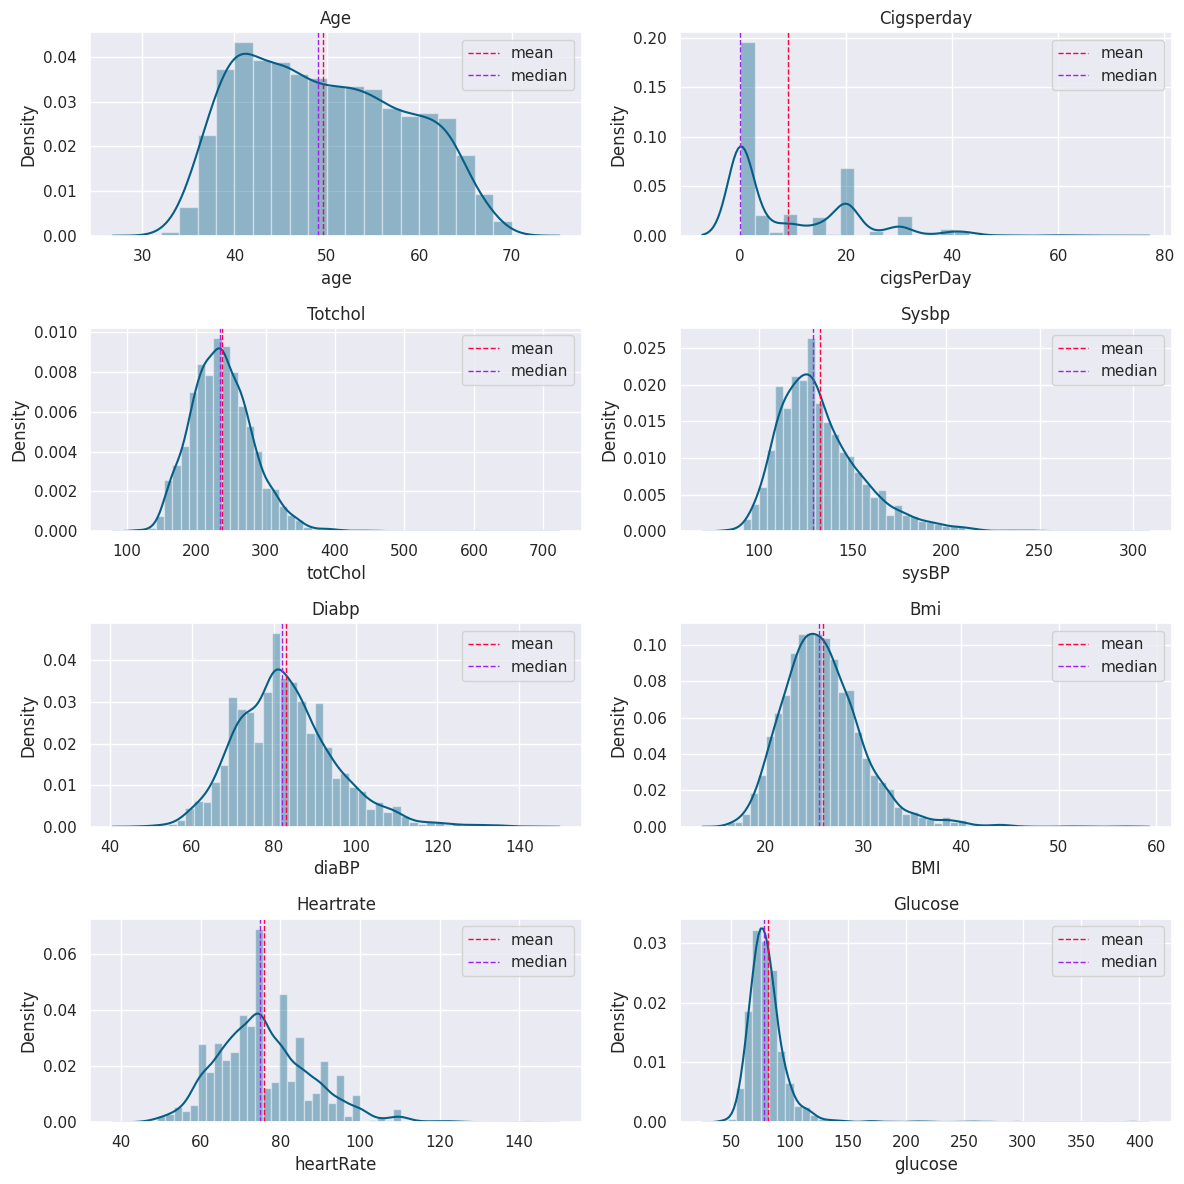

In [21]:
plt.figure(figsize = (12,12));
for i,col in enumerate(['age','cigsPerDay','totChol','sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']):
 
    plt.subplot(4,2,i+1);
    sns.distplot(data[col], color = '#055E85');
    feature = data[col]
    plt.axvline(feature.mean(), color='#ff033e', linestyle='dashed', linewidth=1,label= 'mean');  #red
    plt.axvline(feature.median(), color='#A020F0', linestyle='dashed', linewidth=1,label='median'); #cyan
    plt.legend(bbox_to_anchor = (1.0, 1), loc = 'upper right')
    plt.title(f'{col.title()}');
    plt.tight_layout();

##### 1. Why did you pick the specific chart?

Distribution charts, also known as density plots or histograms, are a great choice for visualizing the distribution of data. They show how the data is spread out over a range of values, and can help you identify the shape of the distribution, the presence of outliers, and the location of the center of the data.


##### 2. What is/are the insight(s) found from the chart?

Most of the data of variables are normally distributed but few of them are right skewed. We have to apply a log transformation to make the distribution as normal.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Yes It will help to create positive business impact as it will detect the outlier and tell us the standard deviation through which we know our data range and at what actions we need to take on those levels

#### Chart - 2 Box Plot (Univariate - Numerical)

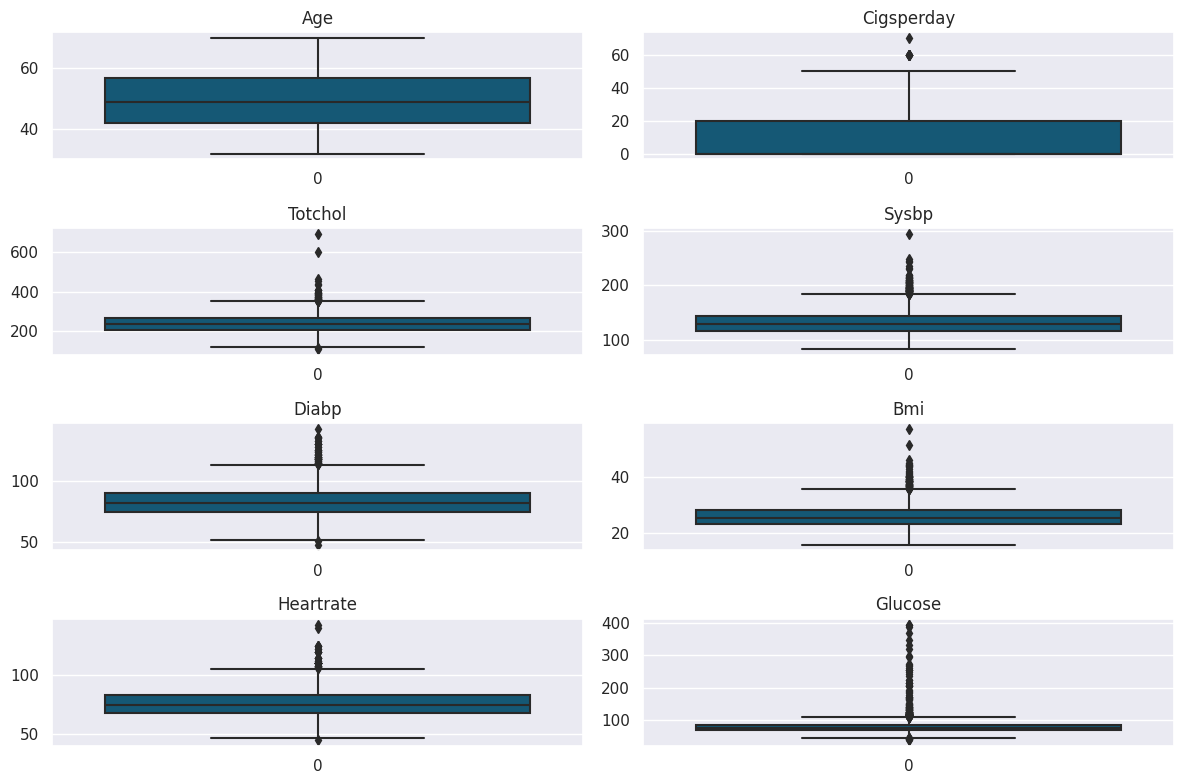

In [22]:
plt.figure(figsize = (12,8));
for i,col in enumerate(['age','cigsPerDay','totChol','sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']) :
 
    plt.subplot(4,2,i+1);
    sns.boxplot(data[col], color = '#055E85');
    feature = data[col]
    plt.title(f'{col.title()}');
    plt.tight_layout();

##### 1. Why did you pick the specific chart?

Box plots are a great choice for visualizing the distribution of data, especially when you want to compare the distributions of two or more groups. They are useful for showing the range, median, and quartiles of a dataset, and can help you identify outliers and compare the spread of data between groups

##### 2. What is/are the insight(s) found from the chart?

The box plot helps in determining the outliers and we can see there are many outliers in the data which is not good for distribution

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

It will Helps businesses to know the extreme points in data. It Depends on the what variable will effect the data or business on what extent.

#### Chart - 3 Countplot (Univariate - Categorical)

In [23]:
categorical_var = ['sex', 'is_smoking','BPMeds','prevalentStroke', 'prevalentHyp', 'diabetes']

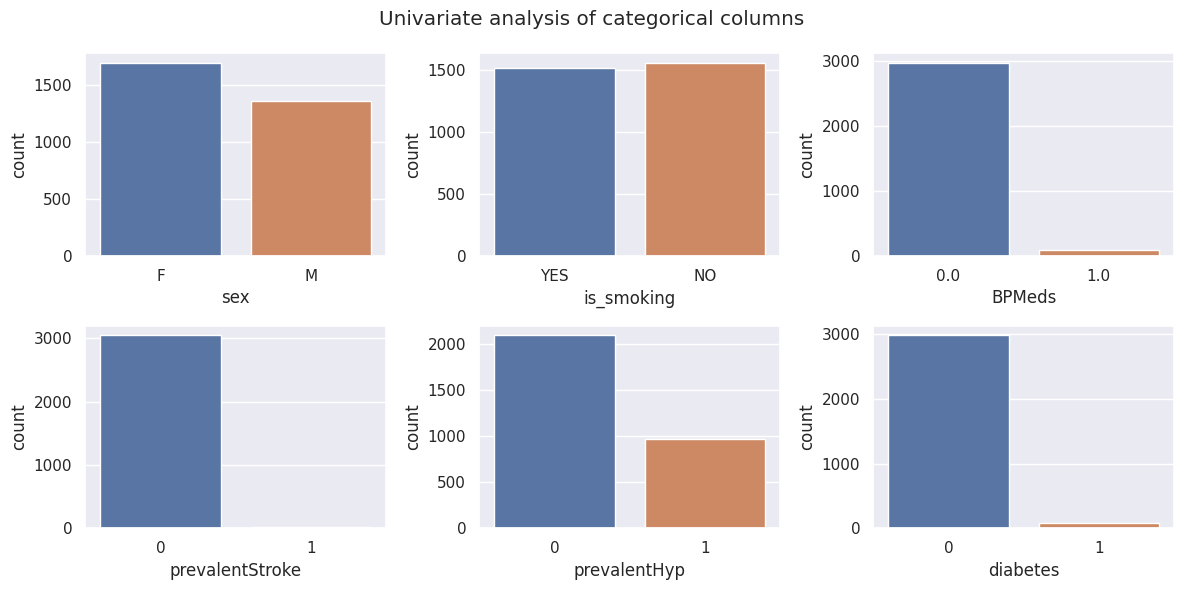

In [24]:
# Chart - 3 visualization code
plt.figure(figsize = (12,6));
plt.suptitle('Univariate analysis of categorical columns')
for i,col in enumerate(categorical_var) :
 
    plt.subplot(2,3,i+1);
    sns.countplot(x = col, data=data);
    feature = data[col]
    plt.tight_layout();

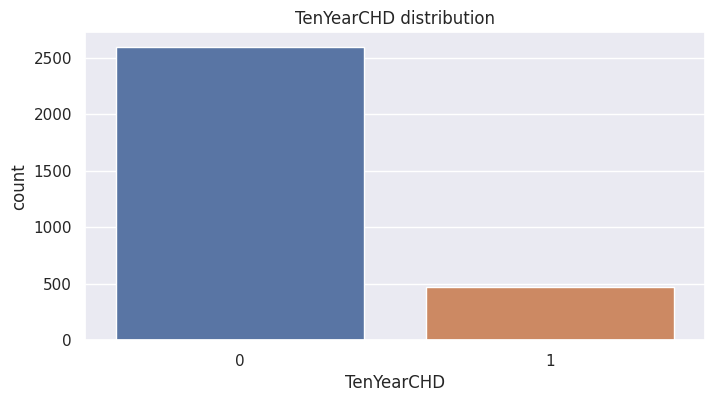

In [25]:
# ploting count plot for Target variable
plt.figure(figsize=(8,4))
sns.countplot(data=data, x='TenYearCHD')
plt.xlabel('TenYearCHD')
plt.title('TenYearCHD distribution')
plt.show()

##### 1. Why did you pick the specific chart?

countplots are a useful tool for quickly visualizing the distribution of categorical variables and identifying patterns and trends in data.

##### 2. What is/are the insight(s) found from the chart?

The Insights found are :

* We mapped 0 as female and 1 as male. There are more female patients compared to male patients.  
* Almost half the patients are smokers.   
* 100 patients under the study are undertaking blood pressure medication.  
* 22 patients under the study have experienced a stroke.  
* 1069 patients have hypertension.    
* 87 patients have diabetes.  
* The classification Dataset is imbalanced.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Yes It will create a positive business impact as it will gives the details about the categorical and discrete variables and help us to know the actions to be taken

#### Chart - 4 Count of Current Smokers by Sex (Bivariate)

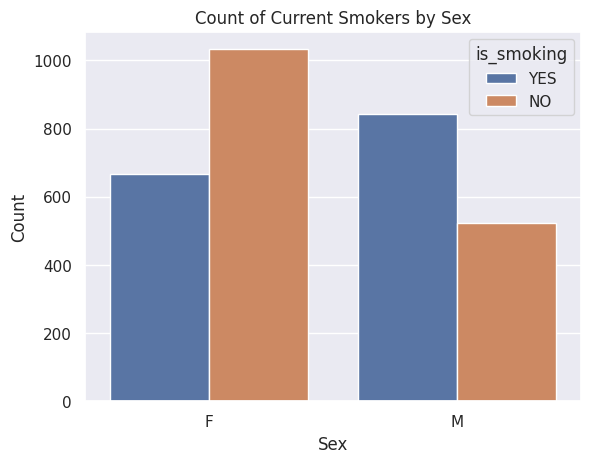

In [26]:
# Create a countplot for sex 
sns.countplot(x='sex', hue='is_smoking', data=data)

# Add labels
plt.xlabel('Sex')
plt.ylabel('Count')
plt.title('Count of Current Smokers by Sex')
# Show the plot
plt.show()

##### 1. Why did you pick the specific chart?

I have selected the countplot of people based on their sex and whether they are current smokers or not, because smoking is a well-known risk factor for cardiovascular disease, including heart disease

##### 2. What is/are the insight(s) found from the chart?

From this count plot, we can observe that a larger number of men smoke as compared to women. This information may suggest that men could potentially be at a higher risk of developing heart disease due to smoking. Therefore, while the countplot provides insights into smoking patterns by gender, further analysis is necessary to determine the exact impact of smoking on heart disease risk in men and women. It is also worth noting that smoking is harmful to both genders, and quitting smoking is an important step in reducing the risk of heart disease and other health problems for both men and women.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

By understanding the differences in smoking patterns between men and women, healthcare professionals and public health advocates can develop targeted interventions to reduce smoking rates and improve cardiovascular health outcomes for both genders 

#### Chart - 5 Frequency of Hypertension by Age Group

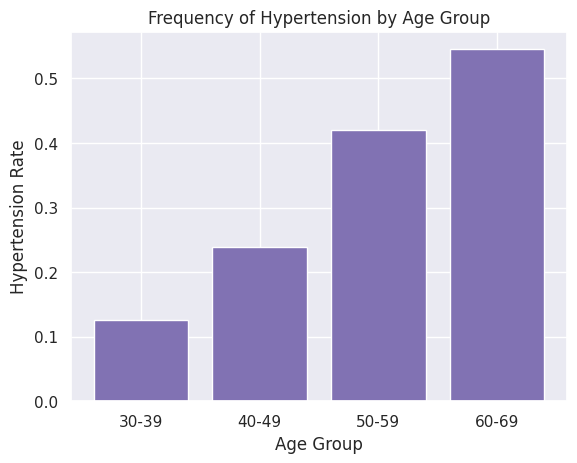

In [27]:
#create age groups
bins = [30, 40, 50, 60, 70, 80]
labels = ['30-39', '40-49', '50-59', '60-69', '70-79']
data['age_group'] = pd.cut(data['age'], bins=bins, labels=labels)

#calculate frequency of hypertension by age group
hypertension_counts = data.groupby('age_group')['prevalentHyp'].sum()
total_counts = data.groupby('age_group')['prevalentHyp'].count()
hypertension_rates = hypertension_counts / total_counts

#create bar chart
x = labels
y = hypertension_rates.values
plt.bar(x, y, color = 'm')
plt.title('Frequency of Hypertension by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Hypertension Rate')
plt.show()   

##### 1. Why did you pick the specific chart?

I picked the specific chart because it effectively displays the frequency of hypertension by age group using a bar chart.

##### 2. What is/are the insight(s) found from the chart?

Based on the chart, we can see that the rate of hypertension generally increases with age, with the highest rate in the 60-69 age group.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

This information can be useful for healthcare professionals in targeting preventative measures and interventions for hypertension in different age groups. Additionally, this chart can be helpful for individuals to understand their risk of developing hypertension based on their age.

#### Chart - 6 Cholesterol Levels by Age and Sex (Multivariate)

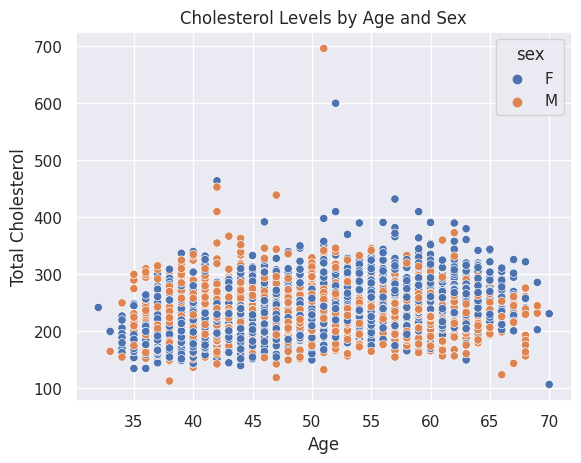

In [28]:
# Create a scatter plot with age on x-axis, cholesterol on y-axis, and sex as hue
sns.scatterplot(x='age', y='totChol', hue='sex', data=data)

# Set the title and axis labels
plt.title('Cholesterol Levels by Age and Sex')
plt.xlabel('Age')
plt.ylabel('Total Cholesterol')

# Show the plot
plt.show()

##### 1. Why did you pick the specific chart?

I have selected this graph to understand the relationship between age, total cholesterol levels, and sex.

##### 2. What is/are the insight(s) found from the chart?

As age increases, the average total cholesterol level also tends to increase for both males and females. Overall, females tend to have higher total cholesterol levels than males at most ages. However, there is more variability in cholesterol levels among females than males, particularly at older ages.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

These insights can be useful for identifying potential risk factors for heart disease, as high cholesterol levels are a known risk factor. Additionally, understanding the differences in cholesterol levels by sex can help inform targeted prevention and treatment strategies

#### Chart - 7 Stacked Bar (Bivariavte) - Dependent Vs Categorical

<Figure size 1000x400 with 0 Axes>

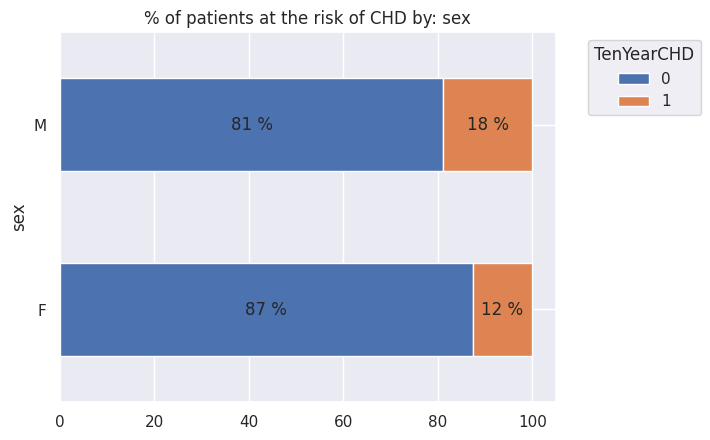

<Figure size 1000x400 with 0 Axes>

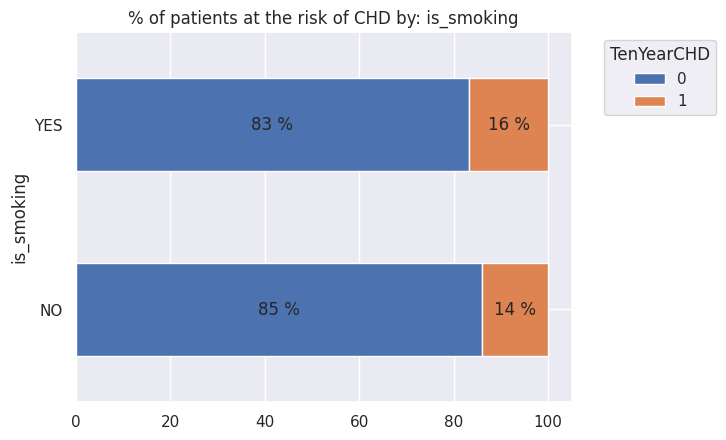

<Figure size 1000x400 with 0 Axes>

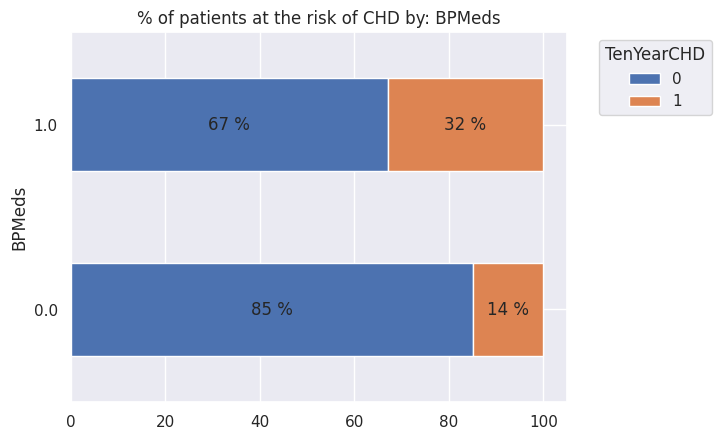

<Figure size 1000x400 with 0 Axes>

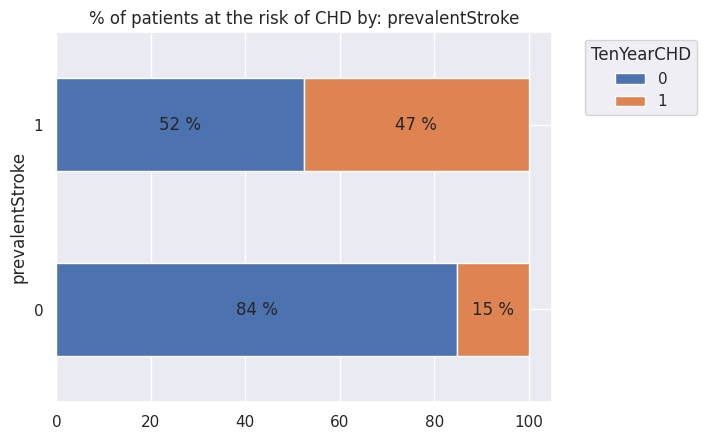

<Figure size 1000x400 with 0 Axes>

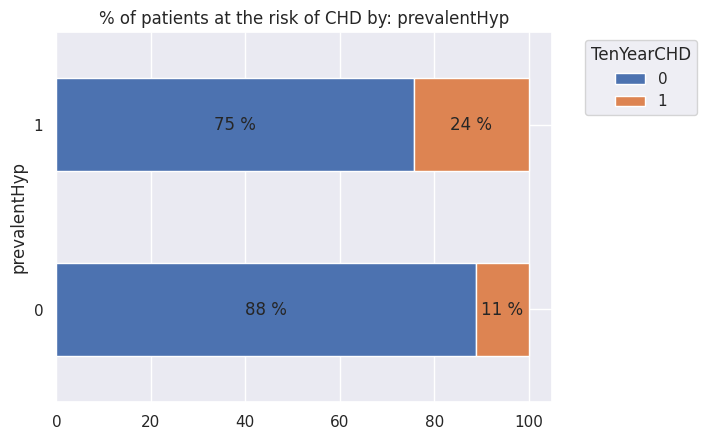

<Figure size 1000x400 with 0 Axes>

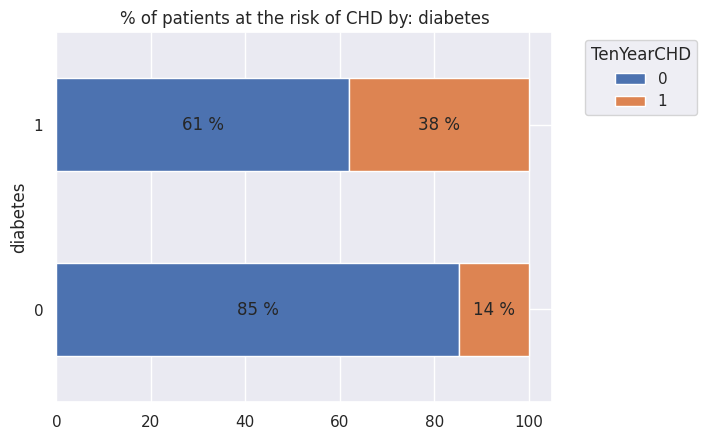

In [29]:
# Chart - 7 visualization code
for i in categorical_var:
    if i== 'TenYearCHD':
      continue
    x_var, y_var = i, 'TenYearCHD'
    plt.figure(figsize=(10,4))
    data_grouped = data.groupby(x_var)[y_var].value_counts(normalize=True).unstack(y_var)*100
    data_grouped.plot.barh(stacked=True)
    plt.legend(bbox_to_anchor=(1.05, 1),loc="upper left",title=y_var)

    plt.title("% of patients at the risk of CHD by: "+i)
    for ix, row in data_grouped.reset_index(drop=True).iterrows():
        # print(ix, row)
        cumulative = 0
        for element in row:
            if element > 0.1:
                plt.text(cumulative + element / 2, ix, f"{int(element)} %", va="center", ha="center",)
            cumulative += element
    plt.show()

##### 1. Why did you pick the specific chart?

In a stacked bar chart, the bars are divided into segments, with each segment representing a different category within the data. The segments are stacked on top of each other to create a single bar. Stacked bar charts are a useful tool for visualizing the distribution of categorical data, especially when you want to compare multiple variables or track changes over time.

##### 2. What is/are the insight(s) found from the chart?

The Insights Found are:

* Male patients have significantly higher risk of CHD (18%) than female patients (12%)
* Patients who smoke have significantly higher risk of CHD (16%) than patients who don't smoke (13%)
* Patients who take BP medicines have significantly higher risk of CHD (33%) than other patients (14%)
* Patients who had experienced a stroke in their life have significantly higher risk of CHD (45%) than other patients (14%)
* Hypertensive patients have significantly higher risk of CHD (23%) than other patients (11%)
* Diabetic patients have significantly higher risk of CHD (37%) than other patients (14%)

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Yes this is Very helpful in creating insights according to the percentages that each condition effect on Cardiovascular risk.

#### Chart - 8 Relation Between prevalentStroke and age with gender(multivariate)

Text(0.5, 1.0, 'Relation Between prevalentStroke and age with gender')

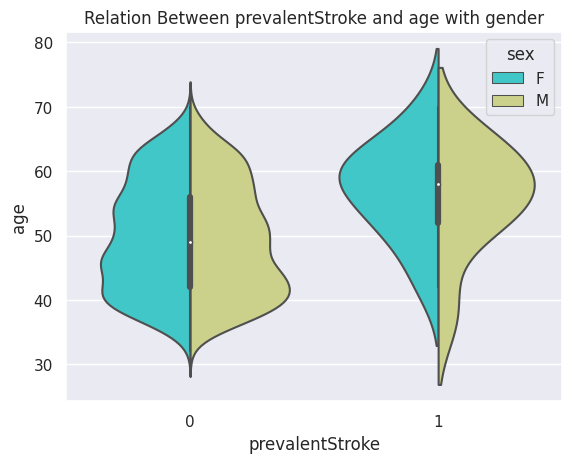

In [30]:
# Chart - 8 visualization code
sns.violinplot(x='prevalentStroke',y="age",data=data, hue='sex', split='True', palette='rainbow')
plt.title('Relation Between prevalentStroke and age with gender')

##### 1. Why did you pick the specific chart?

* I chose a violin plot because it can effectively show the distribution of age for two different groups (individuals with and without a prevalent stroke) while also allowing for comparison of the sex distributions within each group.

##### 2. What is/are the insight(s) found from the chart?

* The chart shows that individuals with a prevalent stroke tend to be older than those without a stroke. Additionally, the chart shows that there are more males than females in both groups, but the proportion of males is higher in the group with prevalent stroke.

##### 3. Will the gained insights help creating a positive business impact? 
* Are there any insights that lead to negative growth? Justify with specific reason.
The gained insights could potentially help healthcare organizations and insurance companies in making decisions about policies related to stroke prevention and treatment. For example, these insights could inform decisions about who should receive certain preventive interventions, such as blood thinners, or about how to design stroke rehabilitation programs. Additionally, insurance companies could use this information to develop policies related to stroke coverage and premiums.

#### Chart - 9 - Correlation Heatmap

<Axes: >

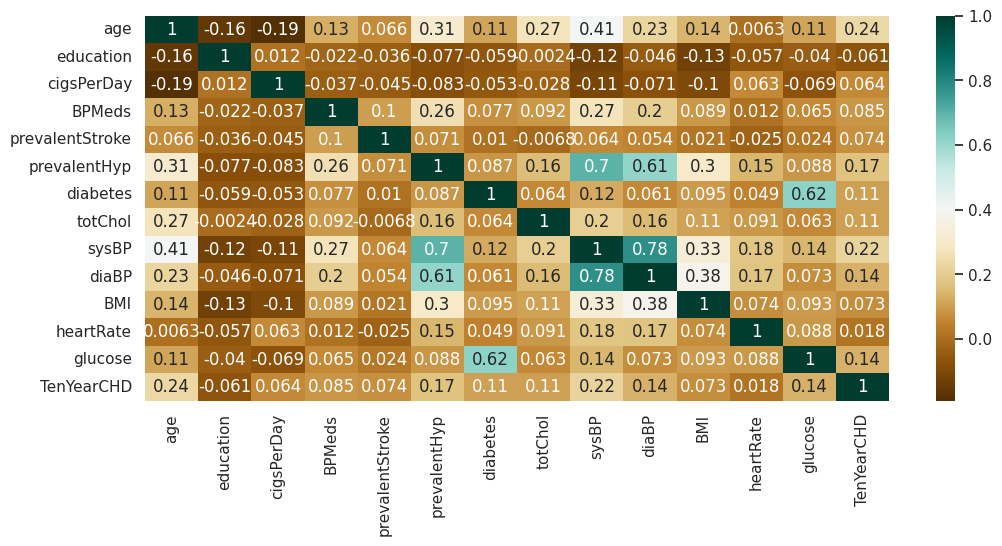

In [31]:
# Correlation Heatmap visualization code
plt.figure(figsize=(12,5))
correlation = data.corr()
sns.heatmap((correlation), annot=True, cmap=sns.color_palette("BrBG", as_cmap=True))

##### 1. Why did you pick the specific chart?

* I picked the Correlation Heatmap because it's an effective way to visualize the correlation between all pairs of features in a dataset. The heatmap uses colors to represent the magnitude of the correlation coefficient, making it easy to quickly identify highly correlated features.

##### 2. What is/are the insight(s) found from the chart?

We can see that following have strong correlation :

* diaBP and sysBP, prevalentHyp and diaBP, prevalentHyp and sysBP, diabetes and glucose

Following have weak correlation :

* glucose and cigPerDay BMI and education , diaBP and education , sysBP and education , prevalentHyp and education , age and education BMI and cigPerDay , diaBP and cigPerDay , sysBP and cigPerDay , prevalentHyp and cigPerDay , age and cigPerDay




#### Chart - 10 - Pair Plot 

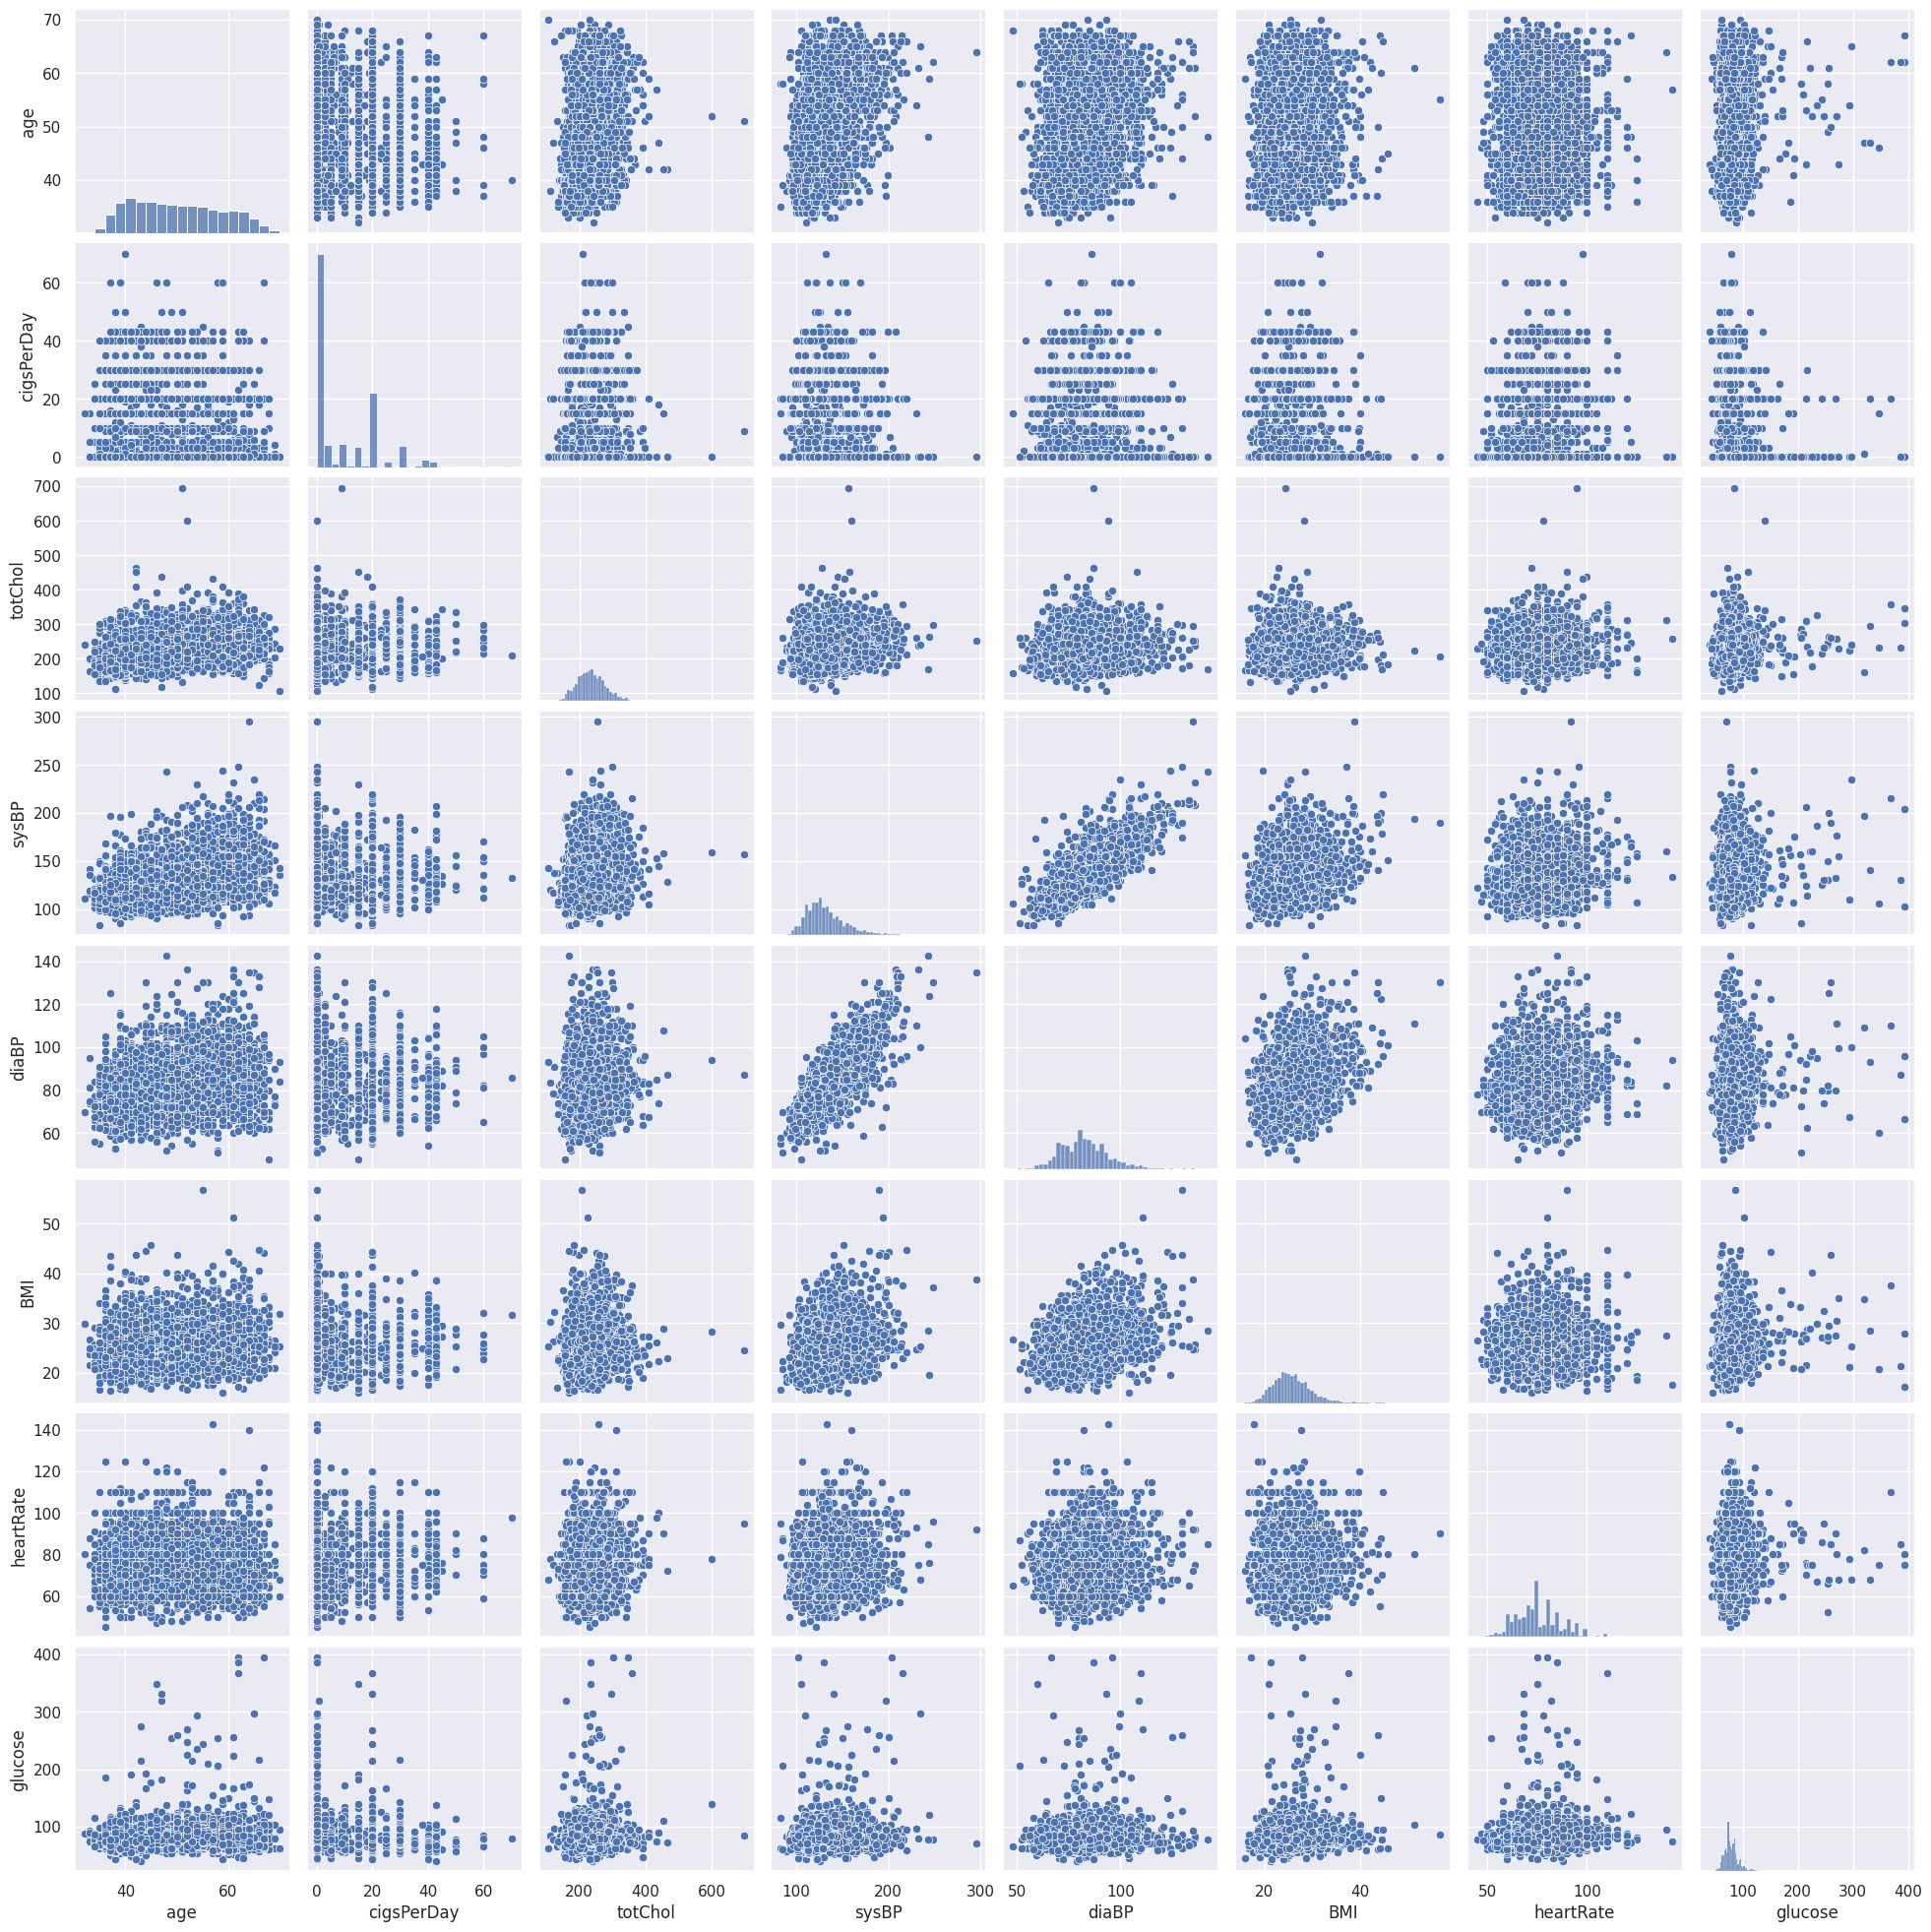

In [32]:
# Pair Plot visualization code
continous_variable = ['age','cigsPerDay','totChol','sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']
sns.pairplot(data[continous_variable])

##### 1. Why did you pick the specific chart?

Pair plot is used to understand the best set of features to explain a relationship between two variables or to form the most separated clusters.

##### 2. What is/are the insight(s) found from the chart?

From the above chart we can infer that sysBP and diaBP are positively correlated

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Answer Here.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

To test the hypothesis that there is a significant difference in systolic blood pressure between individuals with and without prevalent hypertension.

* Null hypothesis (H0): There is no significant difference in systolic blood pressure between individuals with and without prevalent hypertension.

* Alternate hypothesis (H1): There is a significant difference in systolic blood pressure between individuals with and without prevalent hypertension.

#### 2. Perform an appropriate statistical test.

In [33]:
# Perform Statistical Test to obtain P-Value
from scipy import stats
from scipy.stats import ttest_ind

# Extract systolic blood pressure for individuals with and without prevalent hypertension
with_hyp = data[data['prevalentHyp'] == 1]['sysBP']
without_hyp = data[data['prevalentHyp'] == 0]['sysBP']

t_stat, p_val = ttest_ind(with_hyp, without_hyp, equal_var=False)

# Print results
print("P-value: ", p_val)

if p_val< 0.05:
    print('There is a significant difference in systolic blood pressure between individuals with and without prevalent hypertension')
else:
    print('There is no significant difference in systolic blood pressure between individuals with and without prevalent hypertension')

P-value:  1.0503587738492683e-274
There is a significant difference in systolic blood pressure between individuals with and without prevalent hypertension


##### Which statistical test have you done to obtain P-Value?

A two-sample t-test are performed to obtain the p-value.

##### Why did you choose the specific statistical test?

I chose the two-sample independent t-test because it is used to compare the means of two independent groups. In this case, the two independent groups are individuals with and without prevalent hypertension, and the variable of interest is systolic blood pressure.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

* Null hypothesis: There is no significant difference in age between individuals with and without a history of heart disease.

* Alternative hypothesis: There is a significant difference in age between individuals with and without a history of heart disease.

#### 2. Perform an appropriate statistical test.

In [34]:
# Perform Statistical Test to obtain P-Value
from statsmodels.stats.weightstats import ztest

# Extract age for individuals with and without a history of heart disease
with_heart_disease = data[data['TenYearCHD'] == 1]['age']
without_heart_disease = data[data['TenYearCHD'] == 0]['age']

# Perform z-test
z_stat, p_val = ztest(with_heart_disease, without_heart_disease, alternative='two-sided')

# Print results
print("P-value: ", p_val)

if p_val < 0.05:
    print("There is a significant difference in age between individuals with and without a history of heart disease.")
else:
    print("There is no significant difference in age between individuals with and without a history of heart disease.")

P-value:  5.921079388793997e-41
There is a significant difference in age between individuals with and without a history of heart disease.


##### Which statistical test have you done to obtain P-Value?

z-test are performed to obtain the p-value.

##### Why did you choose the specific statistical test?

Z-Test is used usually when data points are independent of each other and data is normally distributed.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

* Null hypothesis: There is no significant association between sex and ten-year risk of developing coronary heart disease.

* Alternate hypothesis: There is a significant association between sex and ten-year risk of developing coronary heart disease.

#### 2. Perform an appropriate statistical test.

In [35]:
# Perform Statistical Test to obtain P-Value
from scipy.stats import chi2_contingency

# Create a contingency table
contingency_table = pd.crosstab(data['sex'], data['TenYearCHD'])

# Perform chi-square test
chi2_stat, p_val, dof, expected = chi2_contingency(contingency_table)

# Print results
print("P-value: ", p_val)

if p_val < 0.05:
    print("There is a significant association between sex and ten-year risk of developing coronary heart disease.")
else:
    print("There is no significant association between sex and ten-year risk of developing coronary heart disease.")

P-value:  2.4982938621782024e-06
There is a significant association between sex and ten-year risk of developing coronary heart disease.


##### Which statistical test have you done to obtain P-Value?

Chi-square test are used.

##### Why did you choose the specific statistical test?

I have used chi-square test in order to determine whether there is a significant association between the two variables.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [36]:
# check missing values from data
data.isna().sum()

age                0
education          0
sex                0
is_smoking         0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
age_group          0
dtype: int64

 In data wrangling I have already  processed and handled null values, There no remaining null values in our dataset.

### 2. Handling Outliers

In [37]:
# Select the continuous variables
continuous_vars = ['cigsPerDay', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']

# Calculate the IQR for each continuous variable
Q1 = data[continuous_vars].quantile(0.25)
Q3 = data[continuous_vars].quantile(0.75)
IQR = Q3 - Q1

# Define a threshold to identify outliers
threshold = 1.5

# Remove the outliers
data = data[~((data[continuous_vars] < (Q1 - threshold * IQR)) |(data[continuous_vars] > (Q3 + threshold * IQR))).any(axis=1)]

In [38]:
data.shape

(2681, 17)

In [39]:
data.head()

,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD,age_group
0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,25.40,90.0,80.0,1,60-69
1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0,30-39
2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0,40-49
3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1,40-49
4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0,60-69


##### What all outlier treatment techniques have you used and why did you use those techniques?

### 3. Categorical Encoding

In [40]:
# Encode your categorical columns
data['sex'] = pd.get_dummies(data['sex'], drop_first=True)
data['is_smoking'] = pd.get_dummies(data['is_smoking'], drop_first=True)

In [41]:
data.head()

,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD,age_group
0,64,2.0,0,1,3.0,0.0,0,0,0,221.0,148.0,85.0,25.40,90.0,80.0,1,60-69
1,36,4.0,1,0,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0,30-39
2,46,1.0,0,1,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0,40-49
3,50,1.0,1,1,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1,40-49
4,64,1.0,0,1,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0,60-69


#### What all categorical encoding techniques have you used & why did you use those techniques?

* The reason for using this technique is that categorical variables are usually non-numeric, but machine learning algorithms require input to be in a numerical format. So we are using one-hot encoding to transform the categorical variables 'sex' and 'is_smoking' into numerical variables in the form of binary values (0 or 1).

* Specifically, it is using the get_dummies() function from the pandas library to create dummy variables, which will represent the categories of each variable as a separate binary column.

* Additionally, the use of drop_first=True parameter is to avoid multicollinearity in the dataset which may occur when two dummy variables are highly correlated.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

* Normal Blood Pressure :      
systolic: less than 120 mm Hg   
diastolic: less than 80 mm Hg

* High Blood Pressure:	
systolic: 140 mm Hg or higher   
diastolic: 90 mm Hg or higher

Upon further investigation of heart issues, we can create a new feature called PP (pulse pressure) which will combine the systolic and diastolic blood pressure readings into a single column.

Pulse pressure is the difference between the upper and lower numbers of  blood pressure. This number can be an indicator of health problems before you develop symptoms. Your pulse pressure can also sometimes that at risk for certain diseases or conditions.

The top number (systolic) minus the bottom number (diastolic) is the pulse pressure. For example, if the resting blood pressure is 120/80 millimeters of mercury (mm Hg), the pulse pressure is 40 — which is considered a healthy pulse pressure. Generally, a pulse pressure greater than 40 mm Hg is unhealthy.

In [42]:
# Manipulate Features to minimize feature correlation and create new feature
data['pulse_Pressure'] = data['sysBP'] - data['diaBP']

In [43]:
data['HypertensionRatio'] = data['prevalentHyp'] / data['diaBP']

In [44]:
data.drop(['sysBP','diaBP','prevalentHyp'],axis=1, inplace=True)

In [45]:
data.drop(['age_group'], axis=1, inplace=True)

#### 2. Feature Selection

In [46]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):
    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [47]:
calc_vif(data[[i for i in data.describe().columns]])

,variables,VIF
0,age,42.894119
1,education,4.751563
2,sex,2.283687
3,is_smoking,5.298648
4,cigsPerDay,4.622447
5,BPMeds,1.099696
6,prevalentStroke,1.023408
7,diabetes,1.013104
8,totChol,36.818641
9,BMI,49.712930


In [48]:
Feature_df=data[['age','education', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds', 'prevalentStroke', 'diabetes', 'pulse_Pressure', 'HypertensionRatio', 'TenYearCHD']]

##### What all feature selection methods have you used  and why?

We have used correlation heatmap and VIF(various inflation factor) and excluded some of the features that were creating noise while model implimentation.Also, we have removed multicolinearity and selected features that are highly dependant on our target variable.

##### Which all features you found important and why?

We have selected below features as our final features as they are highly corelated with the target variable (Sales) and no two features are providing the same information.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [49]:
# Transform Your data

### 6. Data Scaling

In [50]:
# Scaling your data
from sklearn.preprocessing import StandardScaler

# Select the numerical variables to standardize
X_df = Feature_df.drop(['TenYearCHD'], axis=1)
y= Feature_df[['TenYearCHD']]

# Standardize the numerical variables using StandardScaler
std_regressor= StandardScaler()
     
# Fit and Transform
X= std_regressor.fit_transform(X_df)

##### Which method have you used to scale you data and why?
StandardScaler scales the data so that the mean is 0 and the standard deviation is 1. It is a commonly used method for scaling data in machine learning because it preserves the shape of the original distribution and is suitable for most machine learning algorithms, especially those that use distance-based measures. StandardScaler is also useful for the features in the data have significantly different scales because it can help to make the features more comparable.

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

NO it's not needed.

However, in this case of the cardiovascular risk prediction dataset, it is not necessary to perform dimensionality reduction. This is because the dataset has a relatively small number of features compared to the number of samples, which means that the risk of overfitting is low. Additionally, the dataset is relatively small, so the training time for machine learning models would not be a significant issue.

### 8. Handling Imbalanced Dataset

In [51]:
print(Feature_df.TenYearCHD.value_counts())

0    2319
1     362
Name: TenYearCHD, dtype: int64


##### Do you think the dataset is imbalanced? Explain Why.

YES

* The pie chart clearly indicates that the target variable, which is the 10-year risk of coronary heart disease (CHD), is highly imbalanced. Out of the total sample population, 84.9% or 2879 individuals do not have the risk of CHD, while only 15.1% or 511 individuals are at risk. This significant class imbalance in the data could lead to biased predictions and can negatively impact the performance of machine learning models. Therefore, it is necessary to balance the data by applying appropriate techniques such as undersampling or oversampling to improve the accuracy and reliability of the models.

In [52]:
# Handling Imbalanced Dataset (If needed)
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=10)

x_resampled, y_resampled = smote.fit_resample(X, y)

print('Original dataset shape:', Feature_df.shape)
print('Resampled dataset shape:', x_resampled.shape)

print('Class distribution in the resampled dataset:', y_resampled.value_counts())

Original dataset shape: (2681, 11)
Resampled dataset shape: (4638, 10)
Class distribution in the resampled dataset: TenYearCHD
0             2319
1             2319
dtype: int64


##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

I Used the Synthetic Minority Over-sampling Technique (SMOTE) to handle the imbalanced dataset. SMOTE is an oversampling technique that generates synthetic samples for the minority class by interpolating new instances between the existing ones. This technique helps to balance the class distribution and reduces the bias towards the majority class in imbalanced datasets, which can help to improve the performance of machine learning models on imbalanced datasets.

### 9. Data Splitting

In [53]:
# Split your data to train and test. Choose Splitting ratio wisely.
from sklearn.model_selection import train_test_split

## Spliting data
x_train, x_test, y_train, y_test = train_test_split(x_resampled, y_resampled, test_size=0.2, random_state=0)

In [54]:
print(f'x_train is: {x_train.shape}')
print(f'y_train is: {y_train.shape}')
print(f'x_test is: {x_test.shape}')
print(f'y_test is: {y_test.shape}')

x_train is: (3710, 10)
y_train is: (3710, 1)
x_test is: (928, 10)
y_test is: (928, 1)


##### What data splitting ratio have you used and why? 

To prevent overfitting and improve model generalization performance, we allocated 80% of the data to the training set and 20% to the testing set. The train_test_split function from the scikit-learn library was used for this purpose, as it's a common approach for training and testing the model on different data samples.

## ***7. ML Model Implementation***

### ML Model - 1 Logistic Regression

In [55]:
# ML Model - 1 Implementation
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

lr = LogisticRegression(class_weight='balanced',random_state=42)
lr.fit(x_train, y_train)

LogisticRegression(class_weight='balanced', random_state=42)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.
The machine learning model used in the code example provided is Logistic Regression, which is a popular classification algorithm that is used to predict the probability of a binary outcome (i.e., 0 or 1). It is widely used in various fields such as finance, healthcare, marketing, and social sciences.

Logistic Regression works by modeling the probability of an event occurring, given a set of predictor variables. In this case, the model is used to predict the likelihood of a patient developing coronary heart disease within ten years based on several risk factors such as age, sex, smoking habits, and cholesterol levels.

In [56]:
print("Results for Logistic Regression")

y_pred_lr = lr.predict(x_test)

accuracy = accuracy_score(y_test, y_pred_lr)
print('accuracy score =',accuracy)
print("\n")
#Confusion matrix
from sklearn.metrics import *
cm_lr = confusion_matrix(y_test, y_pred_lr)
print('Confusion Matrix')
print(cm_lr)
#evaluation
print(classification_report(y_test,y_pred_lr))

Results for Logistic Regression
accuracy score = 0.6724137931034483


Confusion Matrix
[[307 162]
 [142 317]]
              precision    recall  f1-score   support

           0       0.68      0.65      0.67       469
           1       0.66      0.69      0.68       459

    accuracy                           0.67       928
   macro avg       0.67      0.67      0.67       928
weighted avg       0.67      0.67      0.67       928



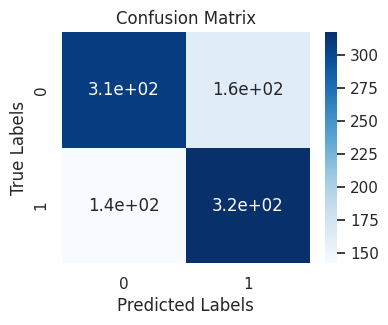

In [57]:
# Visualizing evaluation Metric Score chart
# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred_lr)
plt.figure(figsize=(4,3))
sns.heatmap(cm, annot=True, cmap="Blues")
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

#### 2. Cross- Validation & Hyperparameter Tuning

In [58]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
from sklearn.model_selection import GridSearchCV
#logistic regression
# finding the best parameters for LogisticRegression by gridsearchcv
param_dict = {'C': [0.01,0.1,1,10,100],'penalty': ['l1', 'l2'],'max_iter':[1000]} 
lr_grid_cv = GridSearchCV(lr, param_dict,n_jobs=-1, cv=5, verbose = 5,scoring='recall') 
lr_grid_cv.fit(x_train, y_train)
best_params = lr_grid_cv.best_params_

Fitting 5 folds for each of 10 candidates, totalling 50 fits


In [59]:
best_params 

{'C': 0.1, 'max_iter': 1000, 'penalty': 'l2'}

In [60]:
lr_grid_cv1 = LogisticRegression(penalty ='l2', C= 0.1, max_iter=1000,class_weight='balanced',random_state=42)
lr_grid_cv1.fit(x_train, y_train)

LogisticRegression(C=0.1, class_weight='balanced', max_iter=1000,
                   random_state=42)

In [61]:
print("Results for Cross- Validation & Hyperparameter Tuning on Logistic Regression")

y_pred = lr_grid_cv1.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
print('accuracy score =',accuracy)
print("\n")

#Confusion matrix
cm_lr = confusion_matrix(y_test, y_pred)
print('Confusion Matrix')
print(cm_lr)
#evaluation
print(classification_report(y_test,y_pred))

Results for Cross- Validation & Hyperparameter Tuning on Logistic Regression
accuracy score = 0.6724137931034483


Confusion Matrix
[[307 162]
 [142 317]]
              precision    recall  f1-score   support

           0       0.68      0.65      0.67       469
           1       0.66      0.69      0.68       459

    accuracy                           0.67       928
   macro avg       0.67      0.67      0.67       928
weighted avg       0.67      0.67      0.67       928



##### Which hyperparameter optimization technique have you used and why?

I used GridSearchCV for hyperparameter optimization. GridSearchCV is a simple and commonly used technique for hyperparameter tuning where a grid of hyperparameters is defined and the model is trained and evaluated on all possible combinations of hyperparameters in the grid. It exhaustively searches the hyperparameter space and returns the combination that yields the best performance.

I used GridSearchCV because it is a simple and easy-to-use technique, and it is capable of finding the optimal hyperparameters for a given model. It also helps to avoid overfitting by optimizing hyperparameters on cross-validation sets rather than the training set alone. 

### ML Model - 2 - DecisionTreeClassifier

In [62]:
# ML Model - 2 Implementation
dt_classifier = DecisionTreeClassifier(criterion='entropy', max_leaf_nodes=20, random_state=0)
# Fit the Algorithm
dt_classifier.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_leaf_nodes=20, random_state=0)

In [63]:
print("Results for Logistic Regression")

y_pred_dt = dt_classifier.predict(x_test)

accuracy = accuracy_score(y_test, y_pred_dt)
print('accuracy score =',accuracy)
print("\n")

cm_lr = confusion_matrix(y_test, y_pred_dt)
print('Confusion Matrix')
print(cm_lr)
#evaluation
print(classification_report(y_test,y_pred_dt))

Results for Logistic Regression
accuracy score = 0.7327586206896551


Confusion Matrix
[[347 122]
 [126 333]]
              precision    recall  f1-score   support

           0       0.73      0.74      0.74       469
           1       0.73      0.73      0.73       459

    accuracy                           0.73       928
   macro avg       0.73      0.73      0.73       928
weighted avg       0.73      0.73      0.73       928



#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.



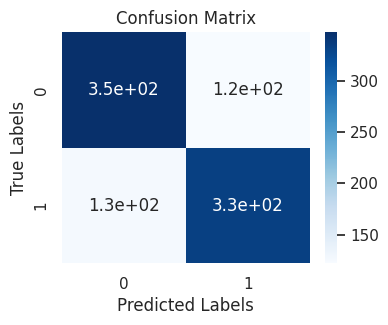

In [64]:
# Visualizing evaluation Metric Score chart
# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred_dt)
plt.figure(figsize=(4,3))
sns.heatmap(cm, annot=True, cmap="Blues")
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

### ML Model - 3 RandomForestClassifier

In [65]:
# ML Model - 3 Implementation
# Fit the Algorithm
forest = RandomForestClassifier(random_state=42)
forest.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

In [66]:
print("Results for Random Forest")

y_pred_rf = forest.predict(x_test)

accuracy = accuracy_score(y_test, y_pred_rf)
print('accuracy score =',accuracy)
print("\n")

#Confusion matrix
cm_lr = confusion_matrix(y_test, y_pred_rf)
print('Confusion Matrix')
print(cm_lr)
#evaluation
print(classification_report(y_test,y_pred_rf))

Results for Random Forest
accuracy score = 0.8523706896551724


Confusion Matrix
[[390  79]
 [ 58 401]]
              precision    recall  f1-score   support

           0       0.87      0.83      0.85       469
           1       0.84      0.87      0.85       459

    accuracy                           0.85       928
   macro avg       0.85      0.85      0.85       928
weighted avg       0.85      0.85      0.85       928



#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

* The RandomForestClassifier model is an ensemble learning method that combines multiple decision trees to improve the accuracy and prevent overfitting. The model randomly selects a subset of features for each tree and aggregates the predictions to make the final decision. In this case, the accuracy score of the model is reported to be **0.8523**, and the    
* classification report shows precision, recall, f1-score, and support metrics for each class. Overall, the RandomForestClassifier model performs well on the given dataset.

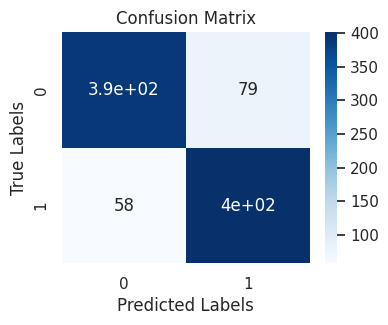

In [67]:
# Visualizing evaluation Metric Score chart
# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(4,3))
sns.heatmap(cm, annot=True, cmap="Blues")
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

#### 2. Cross- Validation & Hyperparameter Tuning

In [68]:
# ML Model - 3 Implementation with hyperparameter optimization techniques GridSearch CV
# Fit the Algorithm
rf_classifier = RandomForestClassifier() # For GBM, use GradientBoostingClassifier()
grid_values = {'n_estimators':[50, 80,  100], 'max_depth':[3, 5, 7]}
rf_gridsearch = GridSearchCV(rf_classifier, param_grid = grid_values, scoring = 'recall', cv=5)

# Fit the object to train dataset
rf_gridsearch.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [3, 5, 7], 'n_estimators': [50, 80, 100]},
             scoring='recall')

In [69]:
print("Results for Cross- Validation & Hyperparameter Tuning on RandomForestClassifier ")

y_pred = rf_gridsearch.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
print('accuracy score =',accuracy)
print("\n")

#Confusion matrix
cm_lr = confusion_matrix(y_test, y_pred)
print('Confusion Matrix')
print(cm_lr)
#evaluation
print(classification_report(y_test,y_pred))

Results for Cross- Validation & Hyperparameter Tuning on RandomForestClassifier 
accuracy score = 0.7661637931034483


Confusion Matrix
[[345 124]
 [ 93 366]]
              precision    recall  f1-score   support

           0       0.79      0.74      0.76       469
           1       0.75      0.80      0.77       459

    accuracy                           0.77       928
   macro avg       0.77      0.77      0.77       928
weighted avg       0.77      0.77      0.77       928



##### Which hyperparameter optimization technique have you used and why?
I used GridSearchCV for hyperparameter optimization. GridSearchCV is a simple and commonly used technique for hyperparameter tuning where a grid of hyperparameters is defined and the model is trained and evaluated on all possible combinations of hyperparameters in the grid. It exhaustively searches the hyperparameter space and returns the combination that yields the best performance.

I used GridSearchCV because it is a simple and easy-to-use technique, and it is capable of finding the optimal hyperparameters for a given model. It also helps to avoid overfitting by optimizing hyperparameters on cross-validation sets rather than the training set alone.

### ML Model - 4

In [70]:
# model4 implementation
from sklearn.svm import SVC
svm_classifier = SVC(kernel = 'linear', random_state = 0)
svm_classifier.fit(x_train, y_train)

SVC(kernel='linear', random_state=0)

In [71]:
print("Results for Support Vector Machine")

y_pred_svm = svm_classifier.predict(x_test)

accuracy = accuracy_score(y_test, y_pred_svm)
print('accuracy score =',accuracy)
print("\n")

#Confusion matrix
cm_lr = confusion_matrix(y_test, y_pred_svm)
print('Confusion Matrix')
print(cm_lr)
#evaluation
print(classification_report(y_test,y_pred_svm))

Results for Support Vector Machine
accuracy score = 0.6788793103448276


Confusion Matrix
[[310 159]
 [139 320]]
              precision    recall  f1-score   support

           0       0.69      0.66      0.68       469
           1       0.67      0.70      0.68       459

    accuracy                           0.68       928
   macro avg       0.68      0.68      0.68       928
weighted avg       0.68      0.68      0.68       928



###ML Model - 5 XGBClassifier

In [72]:
# ML Model - 5 Implementation
xgb_model = xgb.XGBClassifier(random_state=0)
xgb_params = {'n_estimators':[50, 80,  100], 'max_depth':[3, 5, 7]}

In [73]:
# using gridsearchcv to find best parameters
xgb_gridsearch = GridSearchCV(xgb_model,xgb_params,cv=5,scoring='recall')
xgb_gridsearch.fit(x_train,y_train)
xgb_best_params = xgb_gridsearch.best_params_

In [74]:
xgb_best_params

{'max_depth': 7, 'n_estimators': 80}

In [75]:
# Fitting xgb with best parameters
xgb_model = xgb.XGBClassifier(n_estimators=xgb_best_params['n_estimators'],
                                  max_depth=xgb_best_params['max_depth'],
                                  random_state=0)
# train model
xgb_model.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=80, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=0, ...)

In [76]:
print("Results for XGBClassifier")
y_pred_train_xgb = xgb_model.predict(x_train)
y_pred_test_xgb = xgb_model.predict(x_test)

#calculate accurancy scores
train_accuracy = accuracy_score(y_train, y_pred_train_xgb)
test_accuracy = accuracy_score(y_test, y_pred_test_xgb)
print('Train accuracy score =',train_accuracy)
print('Test accuracy score =',test_accuracy)
# calculate roc_auc
y_train_prob = xgb_model.predict_proba(x_train)[:,1]
y_test_prob = xgb_model.predict_proba(x_test)[:,1]
train_roc_auc = roc_auc_score(y_train, y_train_prob)
test_roc_auc = roc_auc_score(y_test, y_test_prob)
print('Train_roc_auc =',train_accuracy)
print('Test_roc_auc =',test_accuracy)
print("\n")

#Confusion matrix
cm_xgb = confusion_matrix(y_test, y_pred_test_xgb)
print('Confusion Matrix')
print(cm_xgb)
#evaluation
print(classification_report(y_test,y_pred_test_xgb))

Results for XGBClassifier
Train accuracy score = 0.978167115902965
Test accuracy score = 0.8976293103448276
Train_roc_auc = 0.978167115902965
Test_roc_auc = 0.8976293103448276


Confusion Matrix
[[436  33]
 [ 62 397]]
              precision    recall  f1-score   support

           0       0.88      0.93      0.90       469
           1       0.92      0.86      0.89       459

    accuracy                           0.90       928
   macro avg       0.90      0.90      0.90       928
weighted avg       0.90      0.90      0.90       928



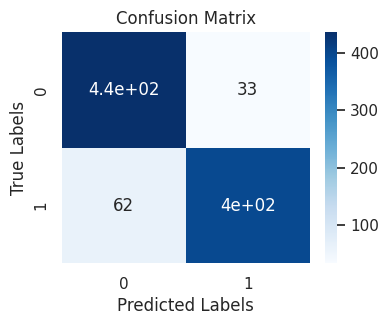

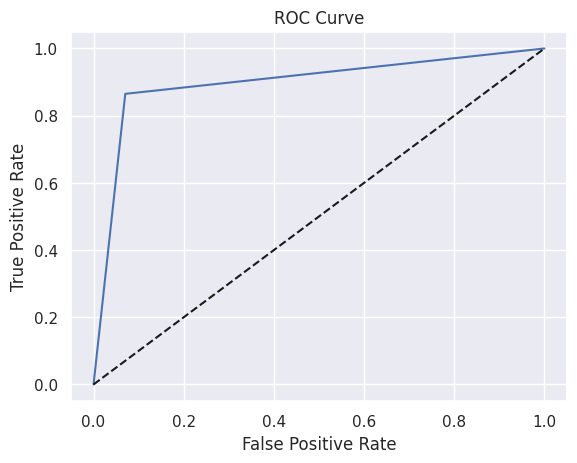

In [77]:
# Visualizing evaluation Metric Score chart
# Create a confusion matrix
plt.figure(figsize=(4,3))
sns.heatmap(cm_xgb, annot=True, cmap="Blues")
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()
# plotting ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_test_xgb)
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()


### 1. Which Evaluation metrics did you consider for a positive business impact and why?

The choice of evaluation metrics for a positive business impact would depend on the specific business problem and objectives. However, some commonly used evaluation metrics that can have a positive business impact are:

1.Accuracy: It measures the overall correct predictions made by the model. It is a commonly used evaluation metric for binary classification problems.

2.Precision and Recall: These metrics are used in binary classification problems where the positive class is of more interest than the negative class. Precision measures the percentage of correct positive predictions out of all positive predictions made by the model, while recall measures the percentage of correct positive predictions out of all actual positive instances in the data.

3.F1-Score: It is a harmonic mean of precision and recall and is often used when both precision and recall are important.

4.ROC-AUC: It is used to evaluate the performance of binary classification models. It measures the trade-off between true positive rate and false positive rate and is a commonly used evaluation metric when the cost of false positives and false negatives are not equal.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

From Above five Model we have choosen XGBClassifier Because it gives best score for all Evaluation metrics rather than other models:
* Train accuracy score = 0.978167115902965
* Test accuracy score = 0.8976293103448276
* Train_roc_auc = 0.978167115902965
* Test_roc_auc = 0.8976293103448276
* precision  = 0.90
* recall  = 92
* f1-score = 90


### 3. Explain the model which you have used and the feature importance using any model explainability tool?

In [78]:
# importance feature
importances = xgb_model.feature_importances_

#Creating a dictonary in order to form the dataframe
features = X_df.columns
importance_dict = {'Feature' :features,
                   'Feature Importance' : importances}

#Creating the dataframe
importance = pd.DataFrame(importance_dict)
sorting_features = importance.sort_values(by=['Feature Importance'],ascending=False)
sorting_features

,Feature,Feature Importance
0,age,0.208546
1,education,0.164602
4,cigsPerDay,0.153330
2,sex,0.097857
8,pulse_Pressure,0.088641
9,HypertensionRatio,0.078734
5,BPMeds,0.078340
3,is_smoking,0.064631
6,prevalentStroke,0.039858
7,diabetes,0.025461


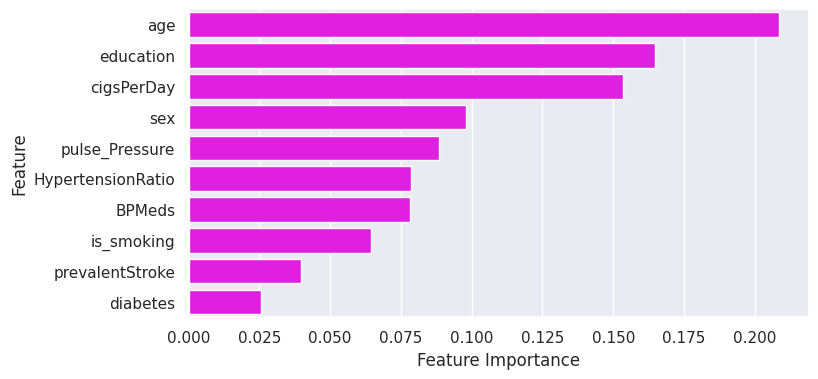

In [79]:
# plotting feature importance graph
plt.figure(figsize=(8,4))
sns.barplot(x='Feature Importance', y='Feature', data=sorting_features, color='Magenta')
plt.show()

The importance of each feature is then normalized such that the sum of all feature importances is equal to 1.0. Therefore, a higher feature importance value indicates that the feature is more important for the model's prediction.

In our case Most important features are:
* age	   
*	education	
*	cigsPerDay	
*	sex	
*	pulse_Pressure	
*	HypertensionRatio	
*	BPMeds	
*	is_smoking

# **Conclusion**

* I trained 5 Machine Learning models using the training dataset, and hyperparameter tuning was used in some models to improve the model performance.

* To build the models, missing values were handled, feature engineering and feature selection was performed, and the training dataset was oversampled using SMOTE to reduce bias on one outcome.

* All the features provided in the dataset are extremely important and contribute towards the risk of getting CHDs. Although, we can conclude some majorly important features like:
   * As age increases the risk of getting diagnosed with heart disease also increases.
   * Cigarette consumption is also a major factor that causes CHDs.
   * Patients having Diabetes and cholesterol problems show a higher risk of CHDs.
   * Patients having high glucose levels are more prone to CHDs.
   * Patients with a history of “strokes” have a higher chance of developing CHDs.
   * Patients with high BMI(Body Mass Index) are at more risk of getting diagnosed with CHDs.

* XGBoost Classifier has performed best among all the models with the accuracy of 97%  & f1-score of 0.90. It is by far the second highest score we have achieved.So,It's safe to say that XGBoost Classifier provides an optimal solution to our problem.

 ### **Thank You !!!**